In [1]:
#%matplotlib plot
%matplotlib notebook

In [35]:
import numpy as np
import logging
import sys

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from moopt import nise, monise, nc, pgen, rennen, xnise, random_weights

logging.disable(logging.NOTSET)
logger = logging.getLogger()
logger.setLevel(level=logging.INFO)

logger.info('Finding th individual minima')

INFO:root:Finding th individual minima


In [36]:
def run(d, wscalar_, sscalar_, algorithm='monise'):    
    if algorithm=='monise':
        moo_ = monise(weightedScalar=wscalar_, singleScalar=sscalar_,
                      nodeTimeLimit=2,
                      targetSize=solsize, targetGap=0, nodeGap=0.01, norm=True)
    if algorithm=='nise':
        moo_ = nise(weightedScalar=wscalar_, singleScalar=sscalar_,
                    targetSize=solsize, norm=True, objective='hp')
    elif algorithm=='random':
        moo_ = random_weights(weightedScalar=wscalar_, singleScalar=sscalar_,
                              targetSize=solsize)
    elif algorithm=='pgen':
        moo_ = pgen(weightedScalar=wscalar_, singleScalar=sscalar_,
                targetSize=solsize, norm=True)
    elif algorithm=='xnise':
        moo_ = xnise(weightedScalar=wscalar_, singleScalar=sscalar_,
                 targetSize=solsize, norm=True)
    elif algorithm=='rennen':
        moo_ = rennen(weightedScalar=wscalar_, singleScalar=sscalar_,
                      targetSize=solsize, norm=True)
    
    moo_.optimize()
    objs = np.array([s.objs for s in moo_.solutionsList])
    
    return objs

## Defining the problem

### $\min w^\top(x-d)^2\\s.a. \sum_{i=1}^m x_i = 1\\  x_i\geq0\ \forall i \in \{1,\ldots,m\}$

In [37]:
from xsquared_scalar import xsquared

The class xsquared implement the defined problem following the rules imposed by the interfaces in moopt/scalarization_interfaces.py.

## Example of the problem with two dimensions

In [38]:
m = 2
#d = np.ones(M)
d = np.random.rand(m)+0.001
d = d/d.max()

wscalar_ = sscalar_ = xsquared(d)

solsize = 50
methods = ['nise', 'monise', 'random', 'pgen', 'xnise', 'rennen']

objs2 = {}
for mth in methods:
    objs2[mth] = run(d, wscalar_, sscalar_, algorithm=mth)

DEBUG:moopt.nise:Finding 0th individual minima
DEBUG:moopt.nise:Finding 1th individual minima
DEBUG:moopt.nise:3th solution - importance: 0.25000000000000006
DEBUG:moopt.nise:4th solution - importance: 0.25
DEBUG:moopt.nise:5th solution - importance: 0.0625000000000001
DEBUG:moopt.nise:6th solution - importance: 0.06250000000000003
DEBUG:moopt.nise:7th solution - importance: 0.0625
DEBUG:moopt.nise:8th solution - importance: 0.06249999999999997
DEBUG:moopt.nise:9th solution - importance: 0.015625000000000083
DEBUG:moopt.nise:10th solution - importance: 0.01562500000000004
DEBUG:moopt.nise:11th solution - importance: 0.015625000000000028
DEBUG:moopt.nise:12th solution - importance: 0.015625000000000017
DEBUG:moopt.nise:13th solution - importance: 0.015625000000000003
DEBUG:moopt.nise:14th solution - importance: 0.015624999999999986
DEBUG:moopt.nise:15th solution - importance: 0.01562499999999998
DEBUG:moopt.nise:16th solution - importance: 0.015624999999999944
DEBUG:moopt.nise:17th solu

DEBUG:moopt.pgen:4th solution, current importance 0.12499999999713354
DEBUG:moopt.pgen:5th solution, current importance 0.12499999998910158
DEBUG:moopt.pgen:6th solution, current importance 0.03125000001774707
DEBUG:moopt.pgen:7th solution, current importance 0.03125000001490896
DEBUG:moopt.pgen:8th solution, current importance 0.007812500022216784
DEBUG:moopt.pgen:9th solution, current importance 0.007812500004503724
DEBUG:moopt.pgen:10th solution, current importance 0.007812499999782691
DEBUG:moopt.pgen:11th solution, current importance 0.007812499977216194
DEBUG:moopt.pgen:12th solution, current importance 0.0019531250214906634
DEBUG:moopt.pgen:13th solution, current importance 0.0019531250074865687
DEBUG:moopt.pgen:14th solution, current importance 0.0019531250067311746
DEBUG:moopt.pgen:15th solution, current importance 0.0019531250000365263
DEBUG:moopt.pgen:16th solution, current importance 0.0019531249993103936
DEBUG:moopt.pgen:17th solution, current importance 0.0019531249921944

DEBUG:moopt.rennen:21th solution, current importance 0.001953125
DEBUG:moopt.rennen:22th solution, current importance 0.001953125
DEBUG:moopt.rennen:23th solution, current importance 0.001953125
DEBUG:moopt.rennen:24th solution, current importance 0.001953125
DEBUG:moopt.rennen:25th solution, current importance 0.001953125
DEBUG:moopt.rennen:26th solution, current importance 0.001953125
DEBUG:moopt.rennen:27th solution, current importance 0.001953125
DEBUG:moopt.rennen:28th solution, current importance 0.001953125
DEBUG:moopt.rennen:29th solution, current importance 0.001953125
DEBUG:moopt.rennen:30th solution, current importance 0.0019531249999999861
DEBUG:moopt.rennen:31th solution, current importance 0.0019531249999999722
DEBUG:moopt.rennen:32th solution, current importance 0.0019531249999999722
DEBUG:moopt.rennen:33th solution, current importance 0.0019531249999999722
DEBUG:moopt.rennen:34th solution, current importance 0.0004882812500000555
DEBUG:moopt.rennen:35th solution, curren

<IPython.core.display.Javascript object>


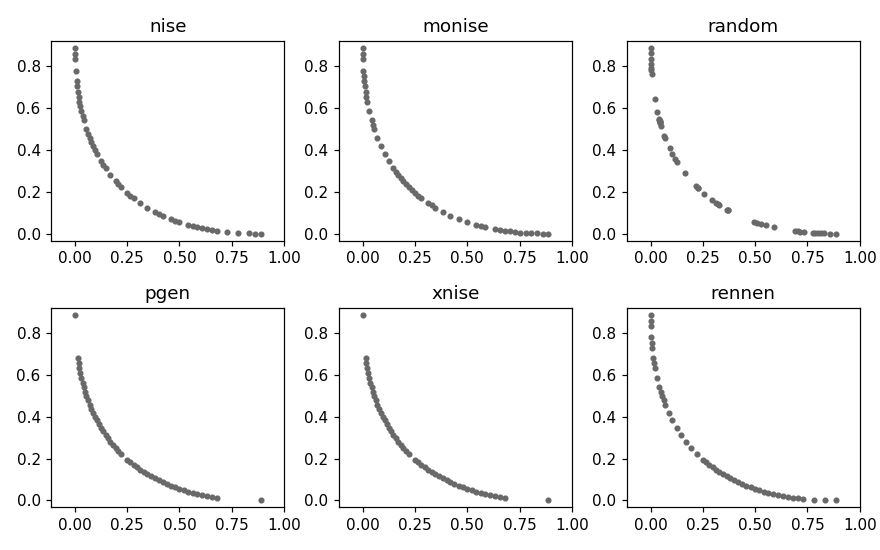

In [6]:
idx = 1
fig = plt.figure(figsize=(8,5))

for mth in methods:
    ax = fig.add_subplot(2,3, idx)
    ax.scatter(objs2[mth][:,0], objs2[mth][:,1], c='dimgrey', marker='.')
    
    plt.title(mth)
    plt.axis('equal')
    
    idx+=1

plt.tight_layout()
plt.show()

## Example of the problem with three dimensions

In [10]:
m = 3
#d = np.ones(M)
d = np.random.rand(m)+0.001
d = d/d.max()

wscalar_ = sscalar_ = xsquared(d)

solsize = 150
methods = ['monise', 'random', 'pgen', 'xnise', 'rennen']

objs3 = {}
for mth in methods:
    objs3[mth] = run(d, wscalar_, sscalar_, algorithm=mth)

<IPython.core.display.Javascript object>


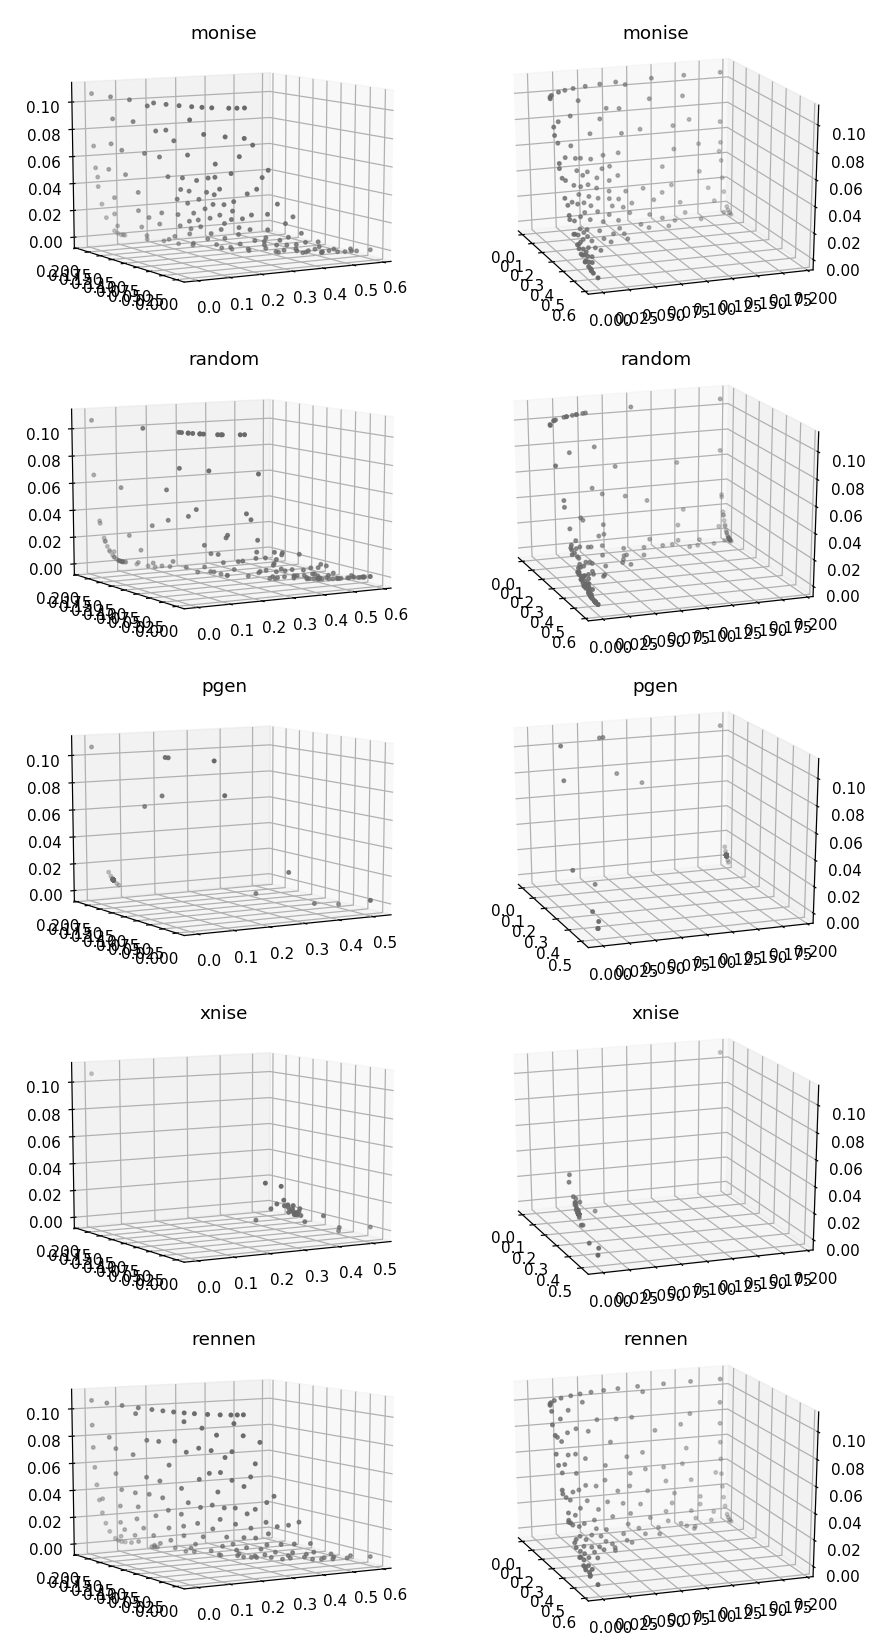

In [11]:
idx = 1
fig = plt.figure(figsize=(8,15))

for mth in methods:
    ax = fig.add_subplot(5,2, 2*idx-1, projection='3d')
    ax.scatter(objs3[mth][:,0], objs3[mth][:,1], objs3[mth][:,2], c='dimgrey', marker='.')
    ax.view_init(10, -120)
    plt.title(mth)
    plt.axis('tight')

    ax = fig.add_subplot(5,2, 2*idx, projection='3d')
    ax.scatter(objs3[mth][:,0], objs3[mth][:,1], objs3[mth][:,2], c='dimgrey', marker='.')
    ax.view_init(20, -20)
    plt.title(mth)
    plt.axis('tight')
    idx+=1


plt.tight_layout()
plt.show()